In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"
cities_df = pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

In [83]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = url + "appid=" + weather_api_key
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=ada756b837cbd94fe41a6bcc7757682e'

In [145]:
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Empty lists
city_name = []
city_ID = [] 
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    try: 
        response = requests.get(f"{query_url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
               
        
    except:
        print("City not found. Skipping...")
        
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

    

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Ski

In [85]:
# Display cities Dataframe
cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [86]:
# Descriptive stats

cities_df.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,273.500000,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,158.338246,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,136.750000,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,273.500000,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,410.250000,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


In [87]:
clean_city_df = cities_df.loc[cities_df["Humidity"] <= 100, :]
clean_city_df


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


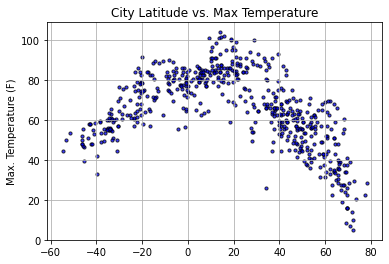

In [88]:
# Plotting the data

    # Latitude vs. Temperature Plot
x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Max Temp"]

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")

plt.grid(True)

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)

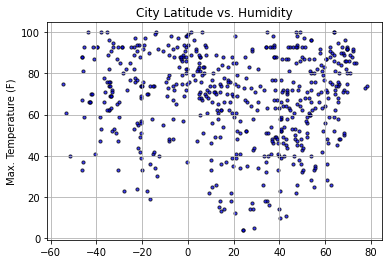

In [103]:
#Latitude vs. Humidity

plt.title("City Latitude vs. Humidity")
plt.ylabel("Max. Temperature (F)")
plt.grid(True)

plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)


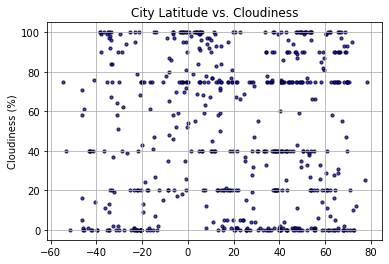

In [100]:
#Latitude vs. Cloudiness

x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Cloudiness"]

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)

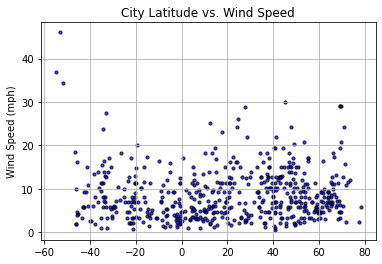

In [98]:
#Latitude vs. Wind Speed

x_axis = clean_city_df["Lat"]
y_axis = clean_city_df["Wind Speed"]

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)

In [106]:
# Create northern snd Southern Hemisphere Dataframes

northern_df = clean_city_df.loc[clean_city_df["Lat"] >= 0, :]
northern_df

southern_df = clean_city_df.loc[clean_city_df["Lat"] < 0, :]
southern_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44
...,...,...,...,...,...,...,...,...,...,...
526,526,viedma,14,AR,1558378894,41,-40.81,-62.99,58.56,10.98
531,531,russell,75,AR,1558378895,71,-33.01,-68.80,50.00,12.75
536,536,padang,100,ID,1558378896,82,-0.92,100.36,81.24,7.65
539,539,palu,72,ID,1558378897,80,-0.90,119.87,78.72,3.83


In [107]:
# Linear Regression

The r-value is: -0.8151657406810828


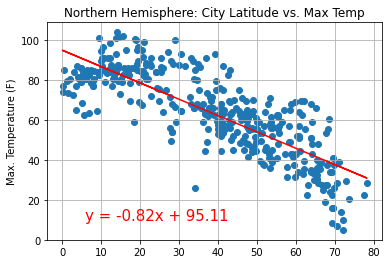

In [138]:
# North: Max Temp vs. Latitude Linear Regression

plt.title("Northern Hemisphere: City Latitude vs. Max Temp")
plt.ylabel("Max. Temperature (F)")
plt.grid(True)

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

Text(-50, 40, 'y = 0.69x + 83.07')

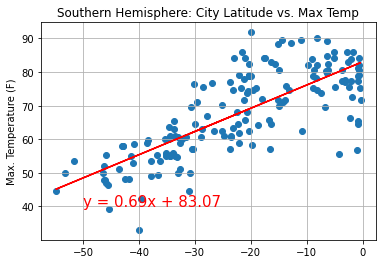

In [127]:
# South: Max Temp vs. Latitude Linear Regression

plt.title("Southern Hemisphere: City Latitude vs. Max Temp")
plt.ylabel("Max. Temperature (F)")
plt.grid(True)

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

Text(6, 10, 'y = 0.11x + 60.85')

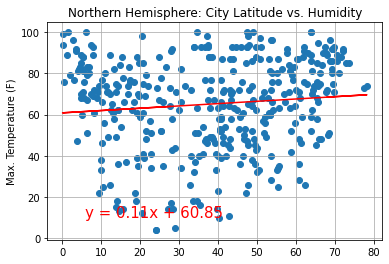

In [121]:
# North: Humidity vs. Latitude Linear Regression

plt.title("Northern Hemisphere: City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.grid(True)

x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

Text(-50, 40, 'y = 0.16x + 75.63')

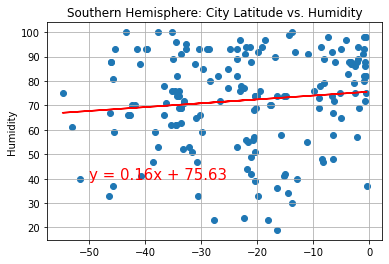

In [130]:
# South: Humidity vs. Latitude Linear Regression

plt.title("Southern Hemisphere: City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.grid(True)

x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

Text(6, 10, 'y = -0.15x + 55.94')

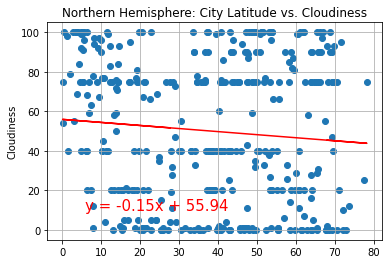

In [131]:
# North: Cloudiness vs. Latitude Linear Regression

plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.grid(True)

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.2300984616633573


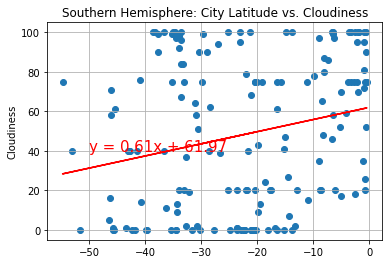

In [141]:
# South: Cloudiness vs. Latitude Linear Regression

plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.grid(True)

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.10713827743884798


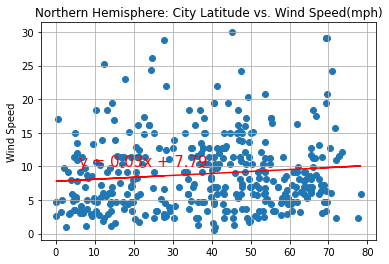

In [142]:
# North: Wind Speed vs. Latitude Linear Regression

plt.title("Northern Hemisphere: City Latitude vs. Wind Speed(mph)")
plt.ylabel("Wind Speed")
plt.grid(True)

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

The r-value is: -0.3360563853923412


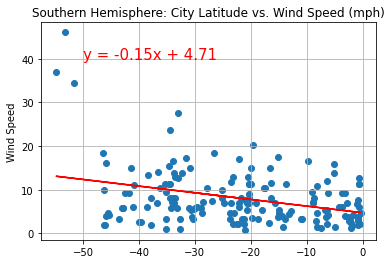

In [144]:
# South: Wind Speed vs. Latitude Linear Regression

plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed")
plt.grid(True)

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")